In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
guns = pd.read_csv('../data/GunViolenceClean.csv')

In [3]:
guns.describe()

,GDP,Homicides,Suicides,Guns.Per.Capita,Cultural.Diversity.Index
count,61.000000,75.00000,68.000000,73.000000,68.000000
mean,36203.278689,4.85120,1.057500,14.617671,0.224588
std,24776.810174,11.39684,1.309996,14.965012,0.182577
min,3700.000000,0.00000,0.000000,0.500000,0.000000
25%,17400.000000,0.15500,0.247500,5.800000,0.077750
50%,34100.000000,0.35000,0.785000,9.900000,0.169500
75%,49600.000000,2.85000,1.255000,21.700000,0.369250
max,124900.000000,66.64000,6.690000,101.000000,0.667000


### Make some columns pythonic

In [4]:
guns = guns.rename(index=str, columns={'Guns.Per.Capita': 'Guns_Per_Capita', 'Cultural.Diversity.Index': 'Cultural_Diversity_Index'})
guns.head()

,Country,GDP,Homicides,Suicides,Guns_Per_Capita,Cultural_Diversity_Index
0,Argentina,20700.0,2.58,1.57,4.6,0.000
1,Australia,49900.0,0.16,0.76,24.1,0.147
2,Austria,49200.0,0.10,2.43,30.4,0.100
3,Azerbaijan,17400.0,0.27,0.01,3.5,0.187
4,Barbados,17500.0,3.12,NaN,7.8,NaN


### Remove rows with empty fields

In [5]:
guns.shape

(76, 6)

In [6]:
guns = guns.dropna()
guns.shape

(51, 6)

## Visuals

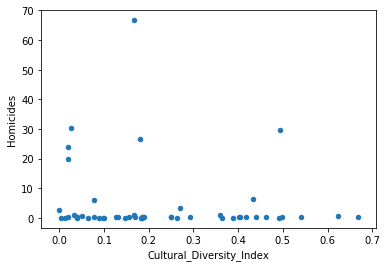

In [7]:
guns.plot.scatter(x='Cultural_Diversity_Index', y='Homicides')
plt.show()

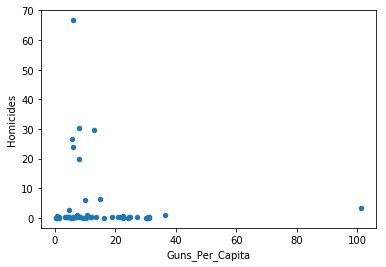

In [8]:
guns.plot.scatter(x='Guns_Per_Capita', y='Homicides')
plt.show()